## HW 11 - Data fitting with various functions - Due FRIDAY 12 Nov , 2021


Dowload the data from the SDSS DR16:<br>
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStar-r12-l33.fits
NOTE: it is a large file and will take a while.


Using masking. Select the approprate fitting function and fit the following selections of the data:
1. Select stars only with with $-1< GLAT < 1$ <br>
   __Fit TEFF,  (TEFF\_ERR)  vs.  LOGG (LOGG\_ERR)__<br>
<br>
2. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
3. Select stars only with with $-2< GLAT < 2$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
4. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (J - K) (J\_ERR, K\_ERR)__<br>
<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
6. __Fit NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
7. __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>
<br>

For each of the above selections:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

def mcFit2(func, x, y, x_err, y_err, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))


def mcFit3(func, x, y, x_err, y_err,p0=[1,1,1]): #p0 is the intaial guess for each variable
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

def mcFit4(func, x, y, x_err, y_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()

<ipython-input-3-3fdb293b0e9e>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


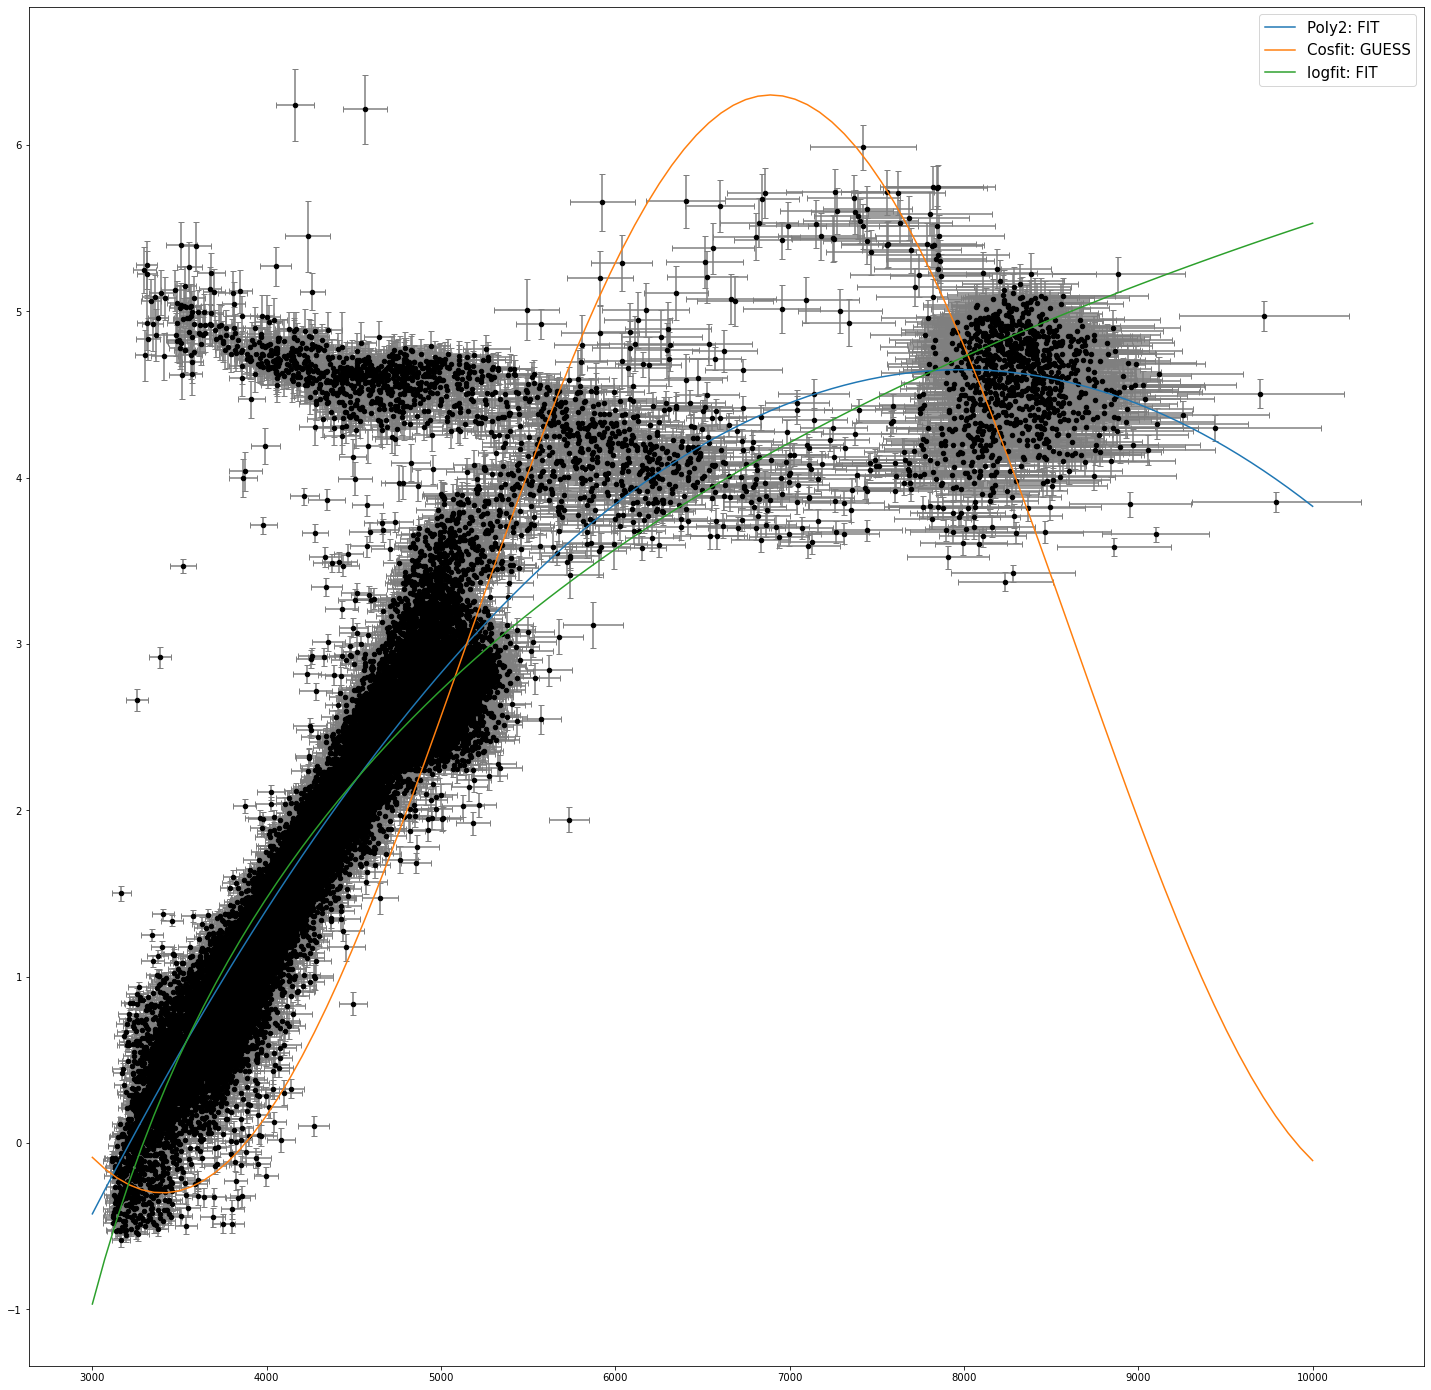

In [6]:
#Graph 1. (−1<𝐺𝐿𝐴𝑇<1) 
#READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data

# let's do a linear fit to the data
mk=(star['GLAT'] >-1) & (star['GLAT'] < 1) & (star['TEFF'] > 0) & (star['LOGG'] >- 5)
mask=np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['LOGG'][mask]
ydat_err = star['LOGG_ERR'][mask]
xdat = star['TEFF'][mask]
xdat_err = star['TEFF_ERR'][mask]

#plot the linear fit
#popt, pcov = opt.curve_fit(linear,xdat, ydat)
#plot poly 2 fit
a2,b2,c2 = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
#plot poly3 3 fit
#a3,b3,c3,d3 = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err)
#plot cosfit
cf1,cf2,cf3,cf4 = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err)
#plot logfit
lf1,lf2,lf3,lf4 = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err)
#plot gausian
#g1,g2 = mcFit2(gausian,xdat, ydat, xdat_err, ydat_err)
#plot lorentzian_cauchy
#lc1,lc2,lc3 = mcFit3(lorentzian_cauchy, xdat, ydat, xdat_err, ydat_err)
#plot sigmoid
#s1,s2,s3,s4 = mcFit4(sigmoid, xdat, ydat, xdat_err, ydat_err)

x_plot = np.linspace(3000,10000,100)


fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
ax.scatter(xdat,ydat,s=20,c='black')
ax.errorbar(xdat, ydat,yerr=ydat_err,xerr=xdat_err, c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)

#ax.plot(x_plot,linear(x_plot, *popt), label='linear: FIT')
ax.plot(x_plot,poly2(x_plot, a2,b2,c2), label='Poly2: FIT')  #this is the best fit
#ax.plot(x_plot,poly3(x_plot, a3,b3,c3,d3), label='Poly3: FIT')
ax.plot(x_plot,cosfit(x_plot, 3.3, .0009, .08, 3), label='Cosfit: GUESS')  #Had to input numbers for the cosine fit because p0 was not allwoing inputs of certain values.
ax.plot(x_plot,logfit(x_plot, lf1, lf2, lf3, lf4), label='logfit: FIT')
#ax.plot(x_plot,gausian(x_plot, g1, g2), label='gausian: FIT')
#ax.plot(x_plot,lorentzian_cauchy(x_plot, lc1,lc2,lc3), label='lorentzian_cauchy: FIT')
#ax.plot(x_plot,sigmoid(x_plot, s1, s2, s3, s4), label='sigmoid: FIT')  



#Legend
plt.legend(loc='best', fontsize=15)
plt.show()

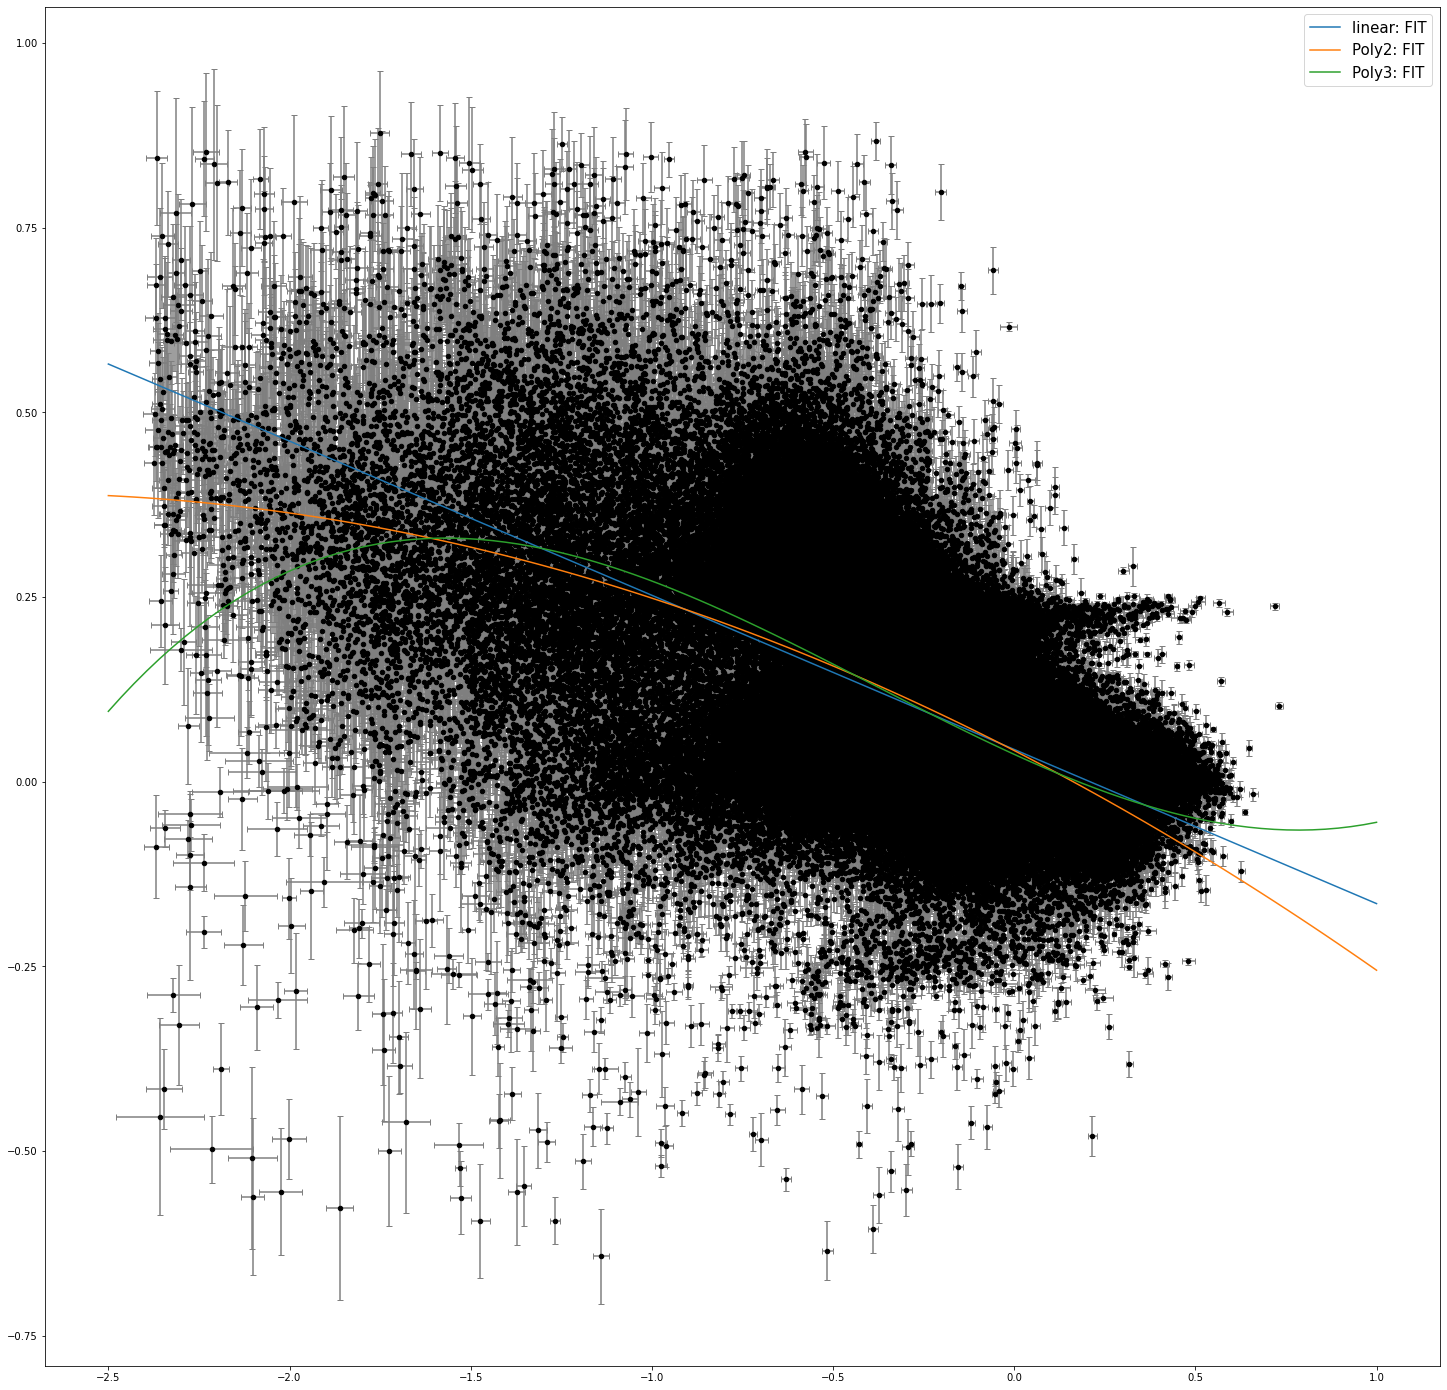

In [23]:
#Graph 2. (𝐺𝐿𝐴𝑇<−10 or 𝐺𝐿𝐴𝑇>10) 

# let's do a linear fit to the data
mk=(star['Fe_H'] > -99) & (star['O_FE'] > -99) & ((star['GLAT'] >-10) | (star['GLAT'] < 10))
mask=np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['O_FE'][mask]
ydat_err = star['O_FE_ERR'][mask]
xdat = star['Fe_H'][mask]
xdat_err = star['Fe_H_ERR'][mask]

#plot the linear fit
af1, af2 = mcFit2(linear,xdat, ydat, xdat_err, ydat_err)
#plot poly 2 fit
a2,b2,c2 = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
#plot poly3 3 fit
a3,b3,c3,d3 = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err)
#plot cosfit
#cf1,cf2,cf3,cf4 = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err)
#plot logfit
#lf1,lf2,lf3,lf4 = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err)
#plot gausian
#g1,g2 = mcFit2(gausian,xdat, ydat, xdat_err, ydat_err)
#plot lorentzian_cauchy
#lc1,lc2,lc3 = mcFit3(lorentzian_cauchy, xdat, ydat, xdat_err, ydat_err)
#plot sigmoid
#s1,s2,s3,s4 = mcFit4(sigmoid, xdat, ydat, xdat_err, ydat_err)


x_plot = np.linspace(-2.5,1,100)


fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
ax.scatter(xdat,ydat,s=20,c='black')
ax.errorbar(xdat, ydat,yerr=ydat_err,xerr=xdat_err, c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.plot(x_plot,linear(x_plot, af1, af2), label='linear: FIT')
ax.plot(x_plot,poly2(x_plot, a2, b2, c2), label='Poly2: FIT')  #best fit
ax.plot(x_plot,poly3(x_plot, a3,b3,c3,d3), label='Poly3: FIT')
#ax.plot(x_plot,cosfit(x_plot, 3.3, .0009, .08, 3), label='Cosfit: GUESS')
#ax.plot(x_plot,logfit(x_plot, lf1, lf2, lf3, lf4), label='logfit: FIT')
#ax.plot(x_plot,gausian(x_plot, g1, g2), label='gausian: FIT')
#ax.plot(x_plot,lorentzian_cauchy(x_plot, lc1,lc2,lc3), label='lorentzian_cauchy: FIT')
#ax.plot(x_plot,sigmoid(x_plot, s1, s2, s3, s4), label='sigmoid: FIT')



#Legend
plt.legend(loc='best', fontsize=15)
plt.show()

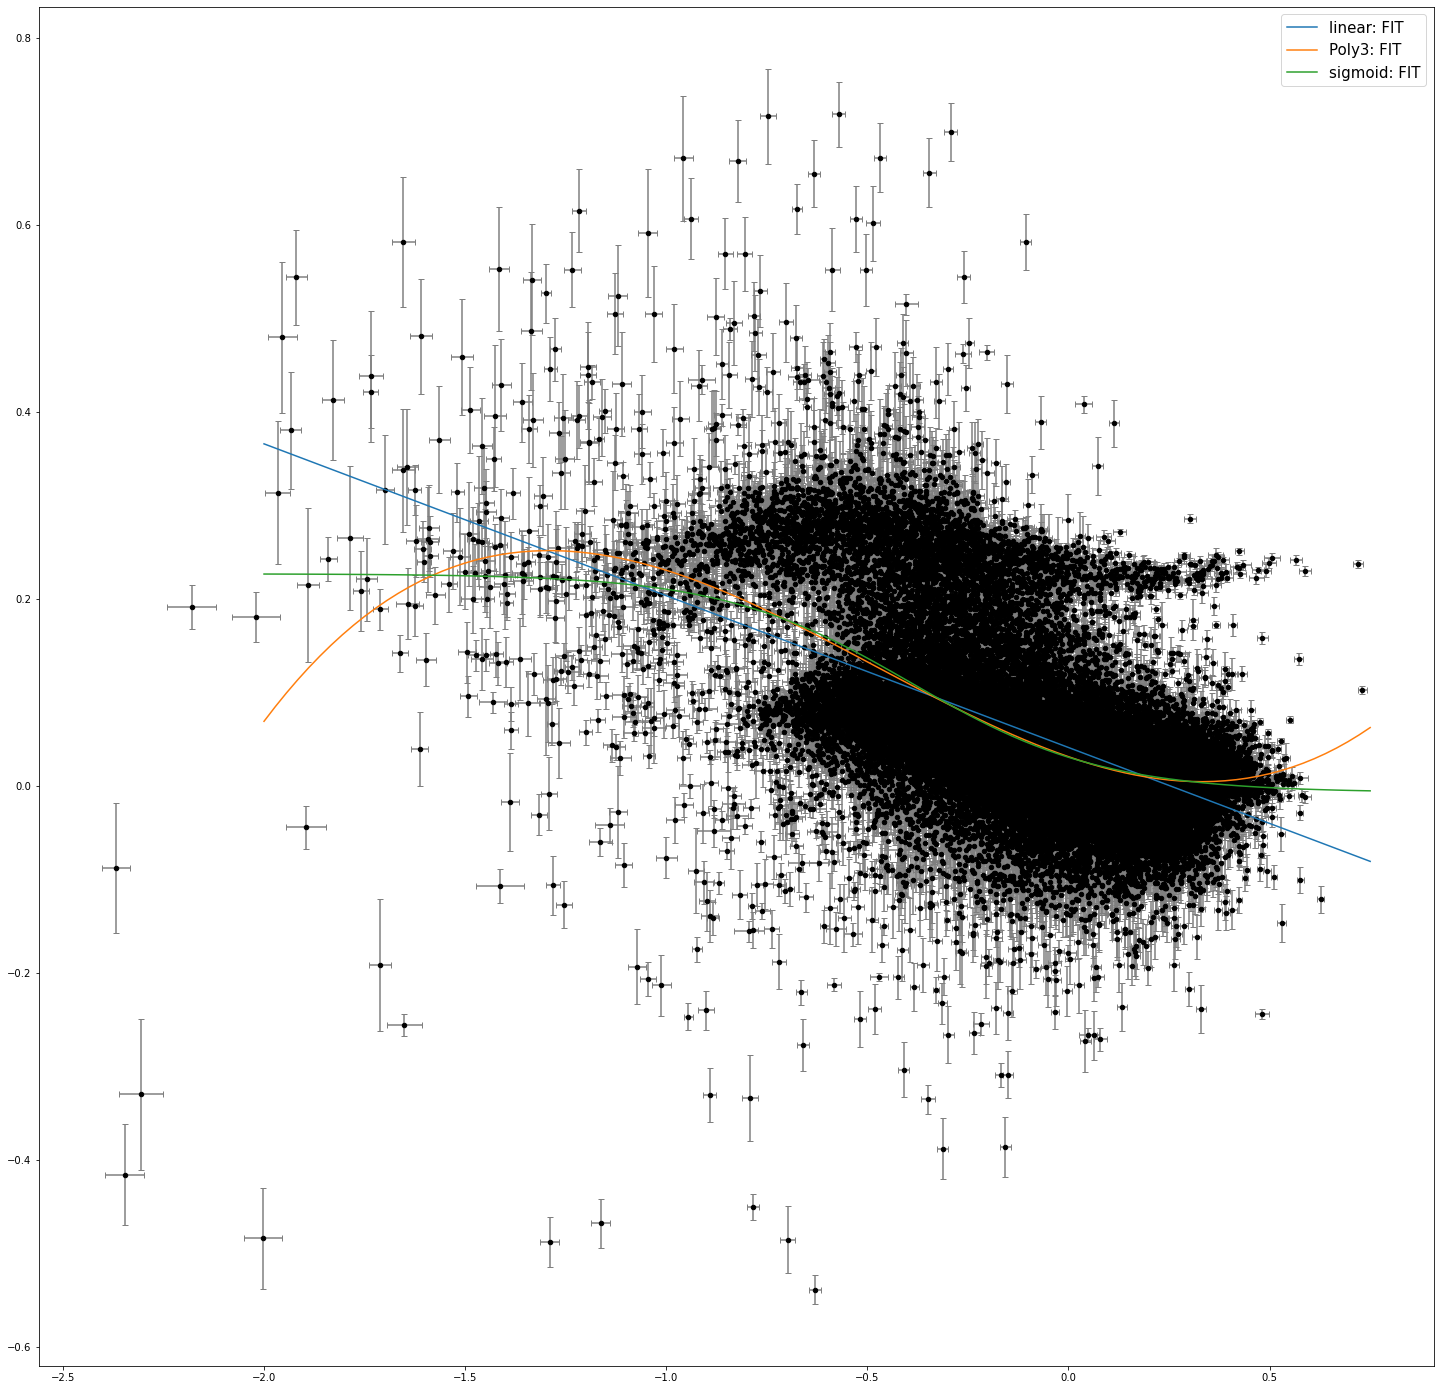

In [9]:
#Graph 3. (-2<𝐺𝐿𝐴𝑇<2) 

# let's do a linear fit to the data
mk=(star['Fe_H'] > -99) & (star['O_FE'] > -99) & (star['GLAT'] > -2) & (star['GLAT'] < 2)
mask=np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['O_FE'][mask]
ydat_err = star['O_FE_ERR'][mask]
xdat = star['Fe_H'][mask]
xdat_err = star['Fe_H_ERR'][mask]

#plot the linear fit
af1, af2 = mcFit2(linear,xdat, ydat, xdat_err, ydat_err)
#plot poly 2 fit
#a2,b2,c2 = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
#plot poly3 3 fit
a3,b3,c3,d3 = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err)
#plot cosfit
#cf1,cf2,cf3,cf4 = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err)
#plot logfit
#lf1,lf2,lf3,lf4 = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err)
#plot gausian
#g1,g2 = mcFit2(gausian,xdat, ydat, xdat_err, ydat_err)
#plot lorentzian_cauchy
#lc1,lc2,lc3 = mcFit3(lorentzian_cauchy, xdat, ydat, xdat_err, ydat_err)
#plot sigmoid
s1,s2,s3,s4 = mcFit4(sigmoid, xdat, ydat, xdat_err, ydat_err,p0=[1,1,.1,.1])

x_plot = np.linspace(-2,.75,100)

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
ax.scatter(xdat,ydat,s=20,c='black')
ax.errorbar(xdat, ydat,yerr=ydat_err,xerr=xdat_err, c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.plot(x_plot,linear(x_plot, af1, af2), label='linear: FIT')
#ax.plot(x_plot,poly2(x_plot, a2, b2, c2), label='Poly2: FIT')
ax.plot(x_plot,poly3(x_plot, a3, b3, c3, d3), label='Poly3: FIT')
#ax.plot(x_plot,cosfit(x_plot, cf1, cf2, cf3, cf4), label='Cosfit: FIT')
#ax.plot(x_plot,logfit(x_plot, lf1, lf2, lf3, lf4), label='logfit: FIT')
#ax.plot(x_plot,gausian(x_plot, g1, g2), label='gausian: FIT')
#ax.plot(x_plot,lorentzian_cauchy(x_plot, lc1,lc2,lc3), label='lorentzian_cauchy: FIT')
ax.plot(x_plot,sigmoid(x_plot, s1, s2, s3, s4), label='sigmoid: FIT')

#Legend
plt.legend(loc='best', fontsize=15)
plt.show()

C:\Users\MU\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


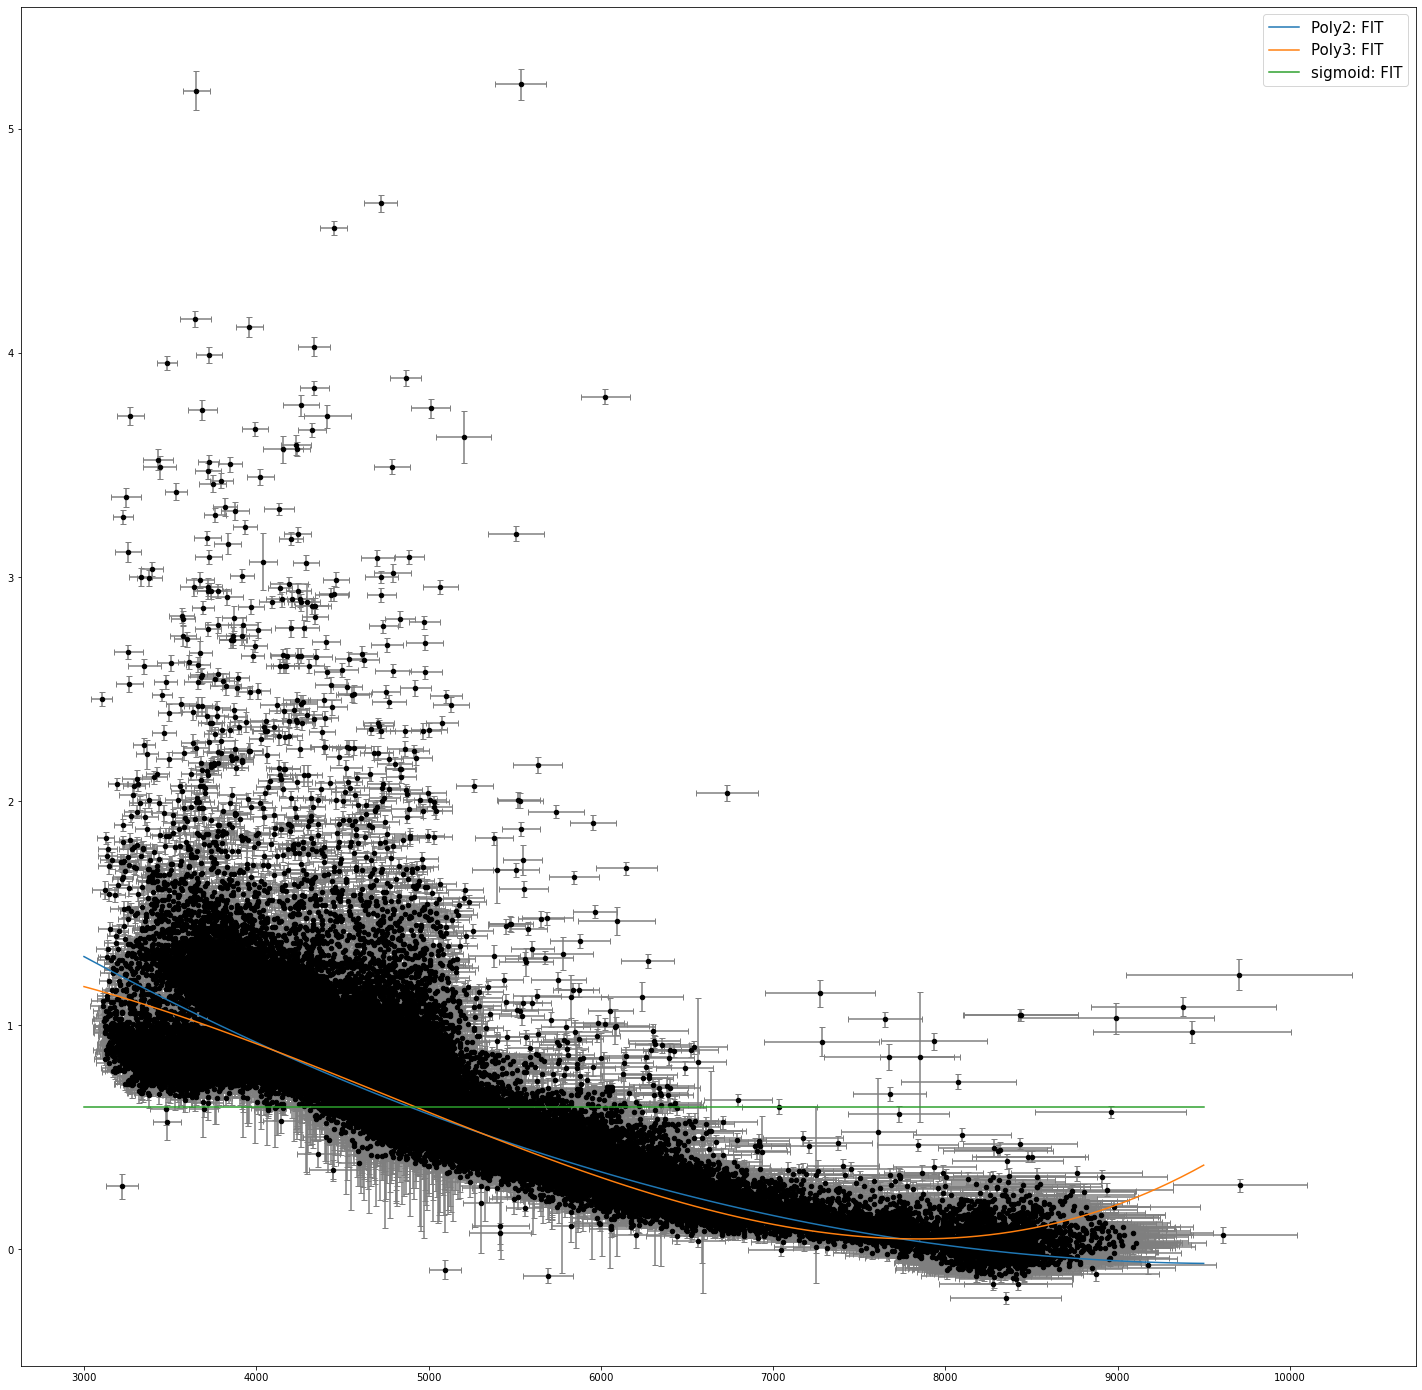

In [12]:
#Graph 4. (𝐺𝐿𝐴𝑇<−10 or 𝐺𝐿𝐴𝑇>10) 

# let's do a linear fit to the data
mk=(star['TEFF'] > 0) & (star['J'] > -9000) & (star['K'] > -9000) &\
   (star['J_ERR'] < 1) & (star['K_ERR'] < 1) &(star['J_ERR'] >-9000) & (star['K_ERR'] >-9000) & ((star['GLAT'] <-10) | (star['GLAT'] > 10))
mask=np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['J'][mask] - star['K'][mask]
ydat_err = np.sqrt((star['J_ERR'][mask]**2) + (star['K_ERR'][mask]**2))
xdat = star['TEFF'][mask]
xdat_err = star['TEFF_ERR'][mask]

#plot the linear fit
#af1, af2 = mcFit2(linear,xdat, ydat, xdat_err, ydat_err)
#plot poly 2 fit
a2,b2,c2 = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
#plot poly3 3 fit
a3,b3,c3,d3 = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err)
#plot cosfit
#cf1,cf2,cf3,cf4 = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err)
#plot logfit
#lf1,lf2,lf3,lf4 = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err)
#plot gausian
#g1,g2 = mcFit2(gausian,xdat, ydat, xdat_err, ydat_err, p0=[1,1,1])
#plot lorentzian_cauchy
#lc1,lc2,lc3 = mcFit3(lorentzian_cauchy, xdat, ydat, xdat_err, ydat_err)
#plot sigmoid
s1,s2,s3,s4 = mcFit4(sigmoid, xdat, ydat, xdat_err, ydat_err,p0=[1,1,.1,.1])

x_plot = np.linspace(3000,9500,100)

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
ax.scatter(xdat,ydat,s=20,c='black')
ax.errorbar(xdat, ydat,yerr=ydat_err,xerr=xdat_err, c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)

#ax.plot(x_plot,linear(x_plot, af1, af2), label='linear: FIT')
ax.plot(x_plot,poly2(x_plot, a2, b2, c2), label='Poly2: FIT') #best fit 
ax.plot(x_plot,poly3(x_plot, a3, b3, c3, d3), label='Poly3: FIT')
#ax.plot(x_plot,cosfit(x_plot, cf1, cf2, cf3, cf4), label='Cosfit: FIT')
#ax.plot(x_plot,logfit(x_plot, lf1, lf2, lf3, lf4), label='logfit: FIT')
#ax.plot(x_plot,gausian(x_plot, g1, g2), label='gausian: FIT')
#ax.plot(x_plot,lorentzian_cauchy(x_plot, lc1,lc2,lc3), label='lorentzian_cauchy: FIT')
ax.plot(x_plot,sigmoid(x_plot, s1, s2, s3, s4), label='sigmoid: FIT')

#Legend
plt.legend(loc='best', fontsize=15)
plt.show()

<ipython-input-2-3fdb293b0e9e>:33: RuntimeWarning: overflow encountered in exp
  return (c/(1 + np.exp(-b*(x-a))) + d)
C:\Users\MU\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


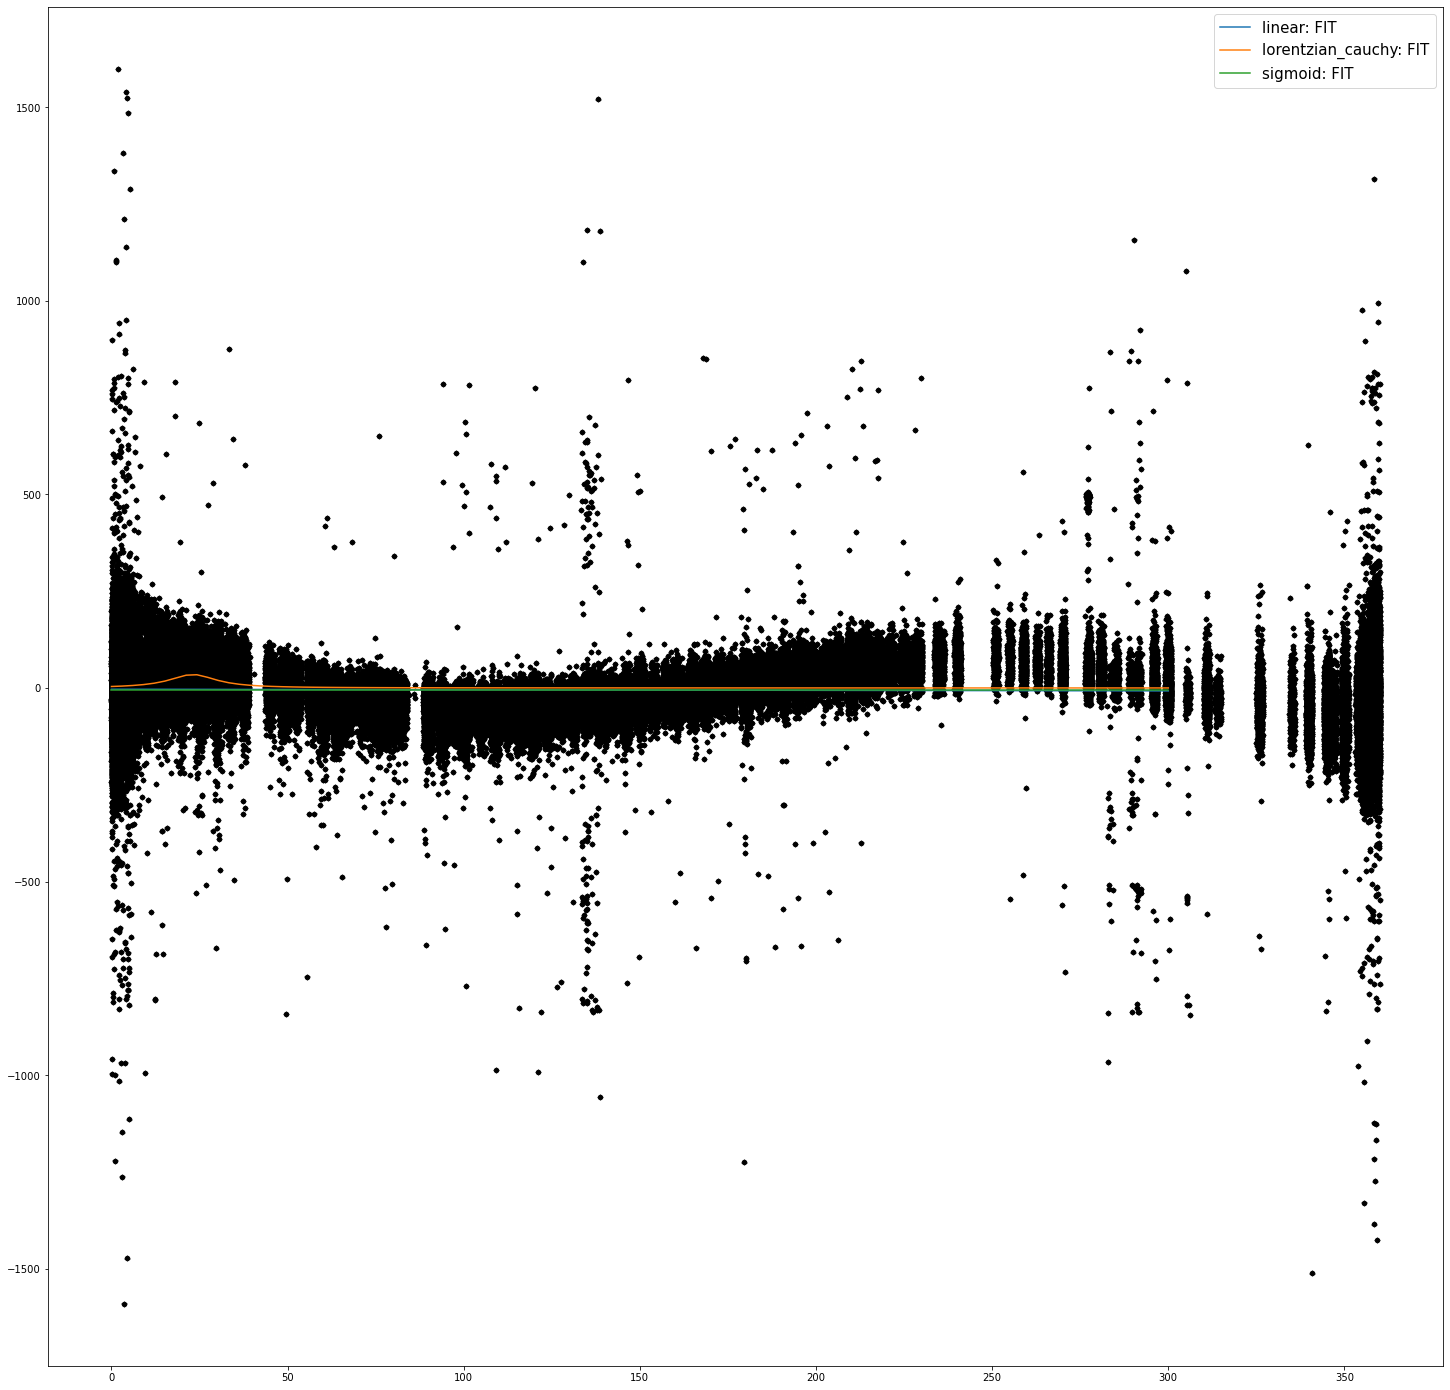

In [3]:
#Graph 5. (-10<𝐺𝐿𝐴𝑇<10) 

# let's do a linear fit to the data
mk=(star['VERR'] < 1.25) & (star['GLAT'] > -10) & (star['GLAT'] < 10)
mask=np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['VHELIO_AVG'][mask]
ydat_err = star['VERR'][mask]
xdat = star['GLON'][mask]
xdat_err = 0

#plot the linear fit
af1, af2 = mcFit2(linear,xdat, ydat, xdat_err, ydat_err)
#plot poly 2 fit
#a2,b2,c2 = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
#plot poly3 3 fit
#a3,b3,c3,d3 = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err)
#plot cosfit
#cf1,cf2,cf3,cf4 = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err)     #cosine fit not working correctly for any graph, might be best fit.
#plot logfit
#lf1,lf2,lf3,lf4 = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err)
#plot gausian
#g1,g2 = mcFit2(gausian,xdat, ydat, xdat_err, ydat_err)
#plot lorentzian_cauchy
lc1,lc2,lc3 = mcFit3(lorentzian_cauchy, xdat, ydat, xdat_err, ydat_err)
#plot sigmoid
s1,s2,s3,s4 = mcFit4(sigmoid, xdat, ydat, xdat_err, ydat_err,p0=[1,1,.1,.1])

x_plot = np.linspace(.5,360,100)

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
ax.scatter(xdat,ydat,s=20,c='black')
ax.errorbar(xdat, ydat,yerr=ydat_err,xerr=xdat_err, c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.plot(x_plot,linear(x_plot, af1, af2), label='linear: FIT')
#ax.plot(x_plot,poly2(x_plot, a2, b2, c2), label='Poly2: FIT')
#ax.plot(x_plot,poly3(x_plot, a3, b3, c3, d3), label='Poly3: FIT')
#ax.plot(x_plot,cosfit(x_plot, 60, .01, .1, 1), label='Cosfit: FIT')
#ax.plot(x_plot,logfit(x_plot, lf1, lf2, lf3, lf4), label='logfit: FIT')
#ax.plot(x_plot,gausian(x_plot, g1, g2), label='gausian: FIT')
ax.plot(x_plot,lorentzian_cauchy(x_plot, lc1,lc2,lc3), label='lorentzian_cauchy: FIT')
ax.plot(x_plot,sigmoid(x_plot, s1, s2, s3, s4), label='sigmoid: FIT')           #best fit, even since cosine fit isn't working.

#Legend
plt.legend(loc='best', fontsize=15)
plt.show()

<ipython-input-2-3fdb293b0e9e>:23: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


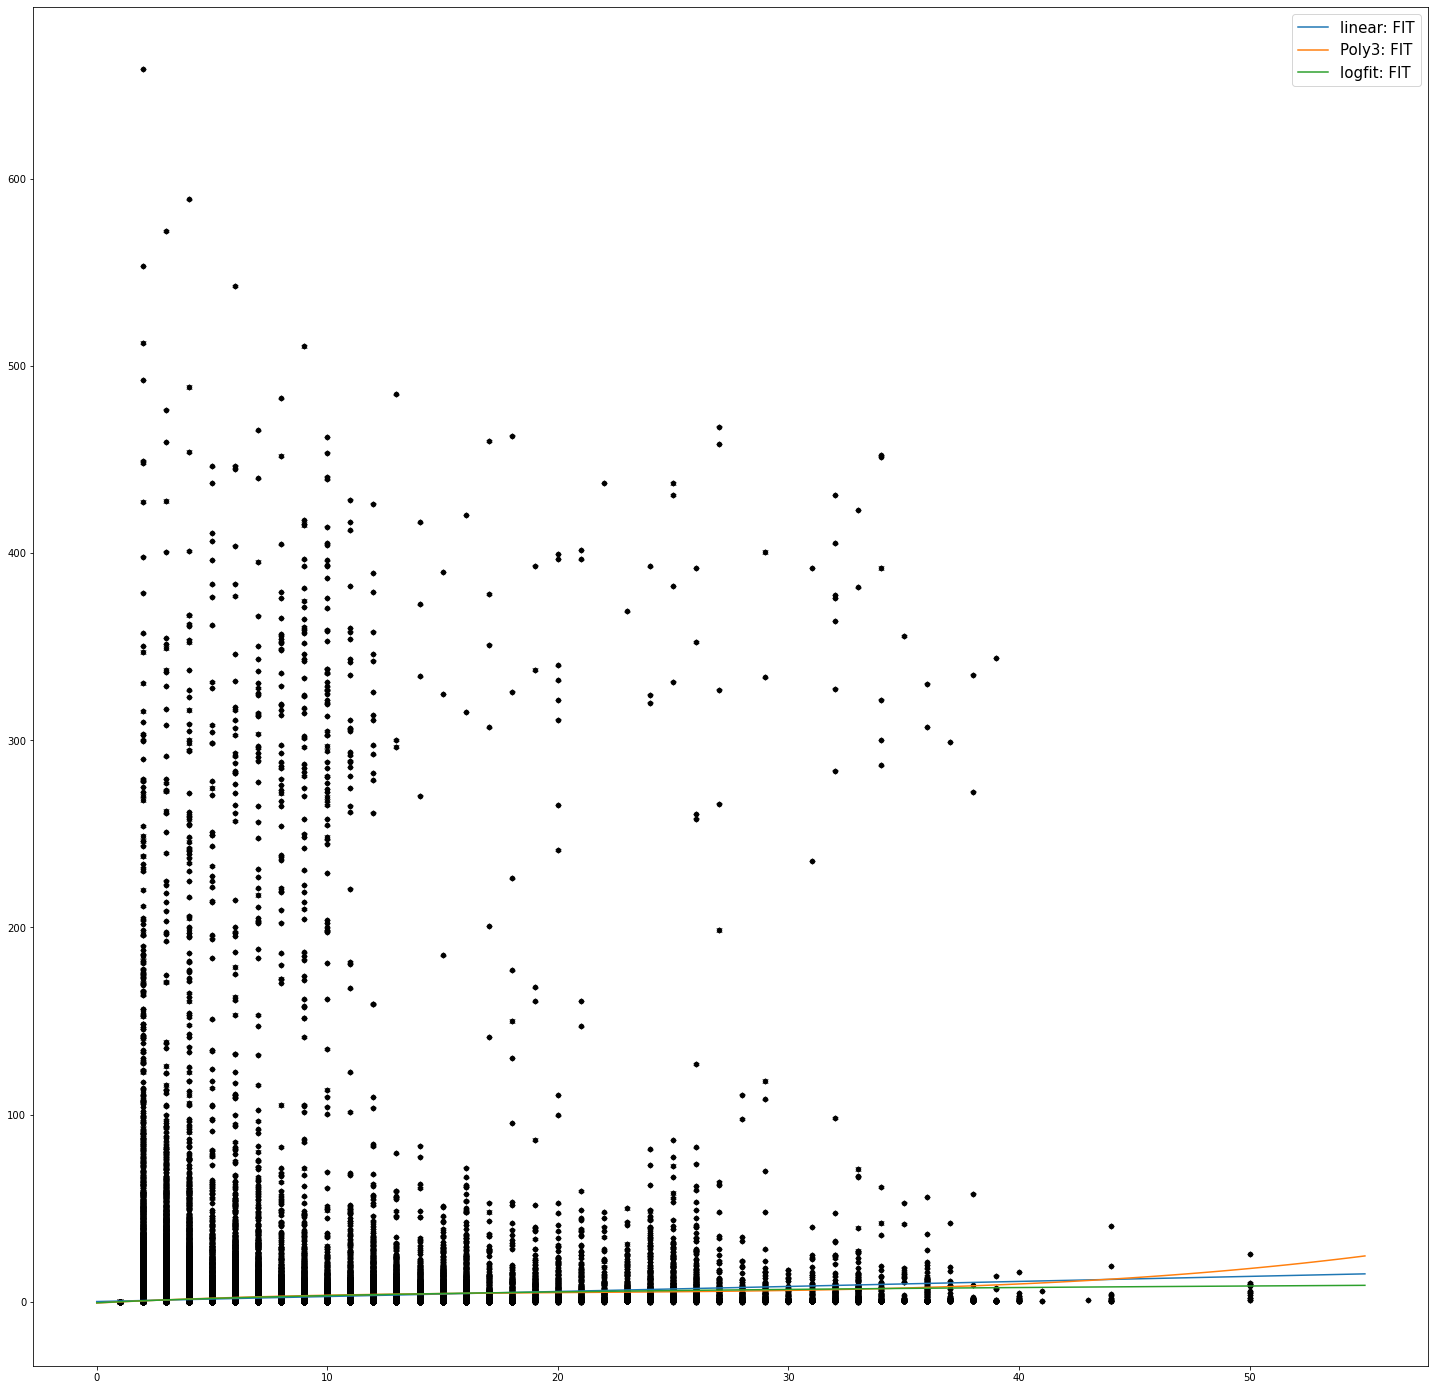

In [7]:
#Graph 6. (NVISITS vs VSCATTER) 

# let's do a linear fit to the data
mk=(star['VERR'] < 1.25) & (star['NVISITS'] >= 1)
mask=np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['VSCATTER'][mask]
ydat_err = star['VERR'][mask]
xdat = star['NVISITS'][mask]
xdat_err = 0

#plot the linear fit
af1, af2 = mcFit2(linear,xdat, ydat, xdat_err, ydat_err)
#plot poly 2 fit
#a2,b2,c2 = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
#plot poly3 3 fit
a3,b3,c3,d3 = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err)
#plot cosfit
#cf1,cf2,cf3,cf4 = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err, p0=[60,.01,.1,1])
#plot logfit
lf1,lf2,lf3,lf4 = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err)
#plot gausian
#g1,g2 = mcFit2(gausian,xdat, ydat, xdat_err, ydat_err)
#plot lorentzian_cauchy
#lc1,lc2,lc3 = mcFit3(lorentzian_cauchy, xdat, ydat, xdat_err, ydat_err)
#plot sigmoid
#s1,s2,s3,s4 = mcFit4(sigmoid, xdat, ydat, xdat_err, ydat_err,p0=[1,1,.1,.1])

x_plot = np.linspace(0,55,100)

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
ax.scatter(xdat,ydat,s=20,c='black')
ax.errorbar(xdat, ydat,yerr=ydat_err,xerr=xdat_err, c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.plot(x_plot,linear(x_plot, af1, af2), label='linear: FIT')  
#ax.plot(x_plot,poly2(x_plot, a2, b2, c2), label='Poly2: FIT')
ax.plot(x_plot,poly3(x_plot, a3, b3, c3, d3), label='Poly3: FIT')   #best fit even though non of the fits, fit well.
#ax.plot(x_plot,cosfit(x_plot, cf1, cf2, cf3, cf4), label='Cosfit: FIT')
ax.plot(x_plot,logfit(x_plot, lf1, lf2, lf3, lf4), label='logfit: FIT')
#ax.plot(x_plot,gausian(x_plot, g1, g2), label='gausian: FIT')
#ax.plot(x_plot,lorentzian_cauchy(x_plot, lc1,lc2,lc3), label='lorentzian_cauchy: FIT')
#ax.plot(x_plot,sigmoid(x_plot, s1, s2, s3, s4), label='sigmoid: FIT')

#Legend
plt.legend(loc='best', fontsize=15)
plt.show()

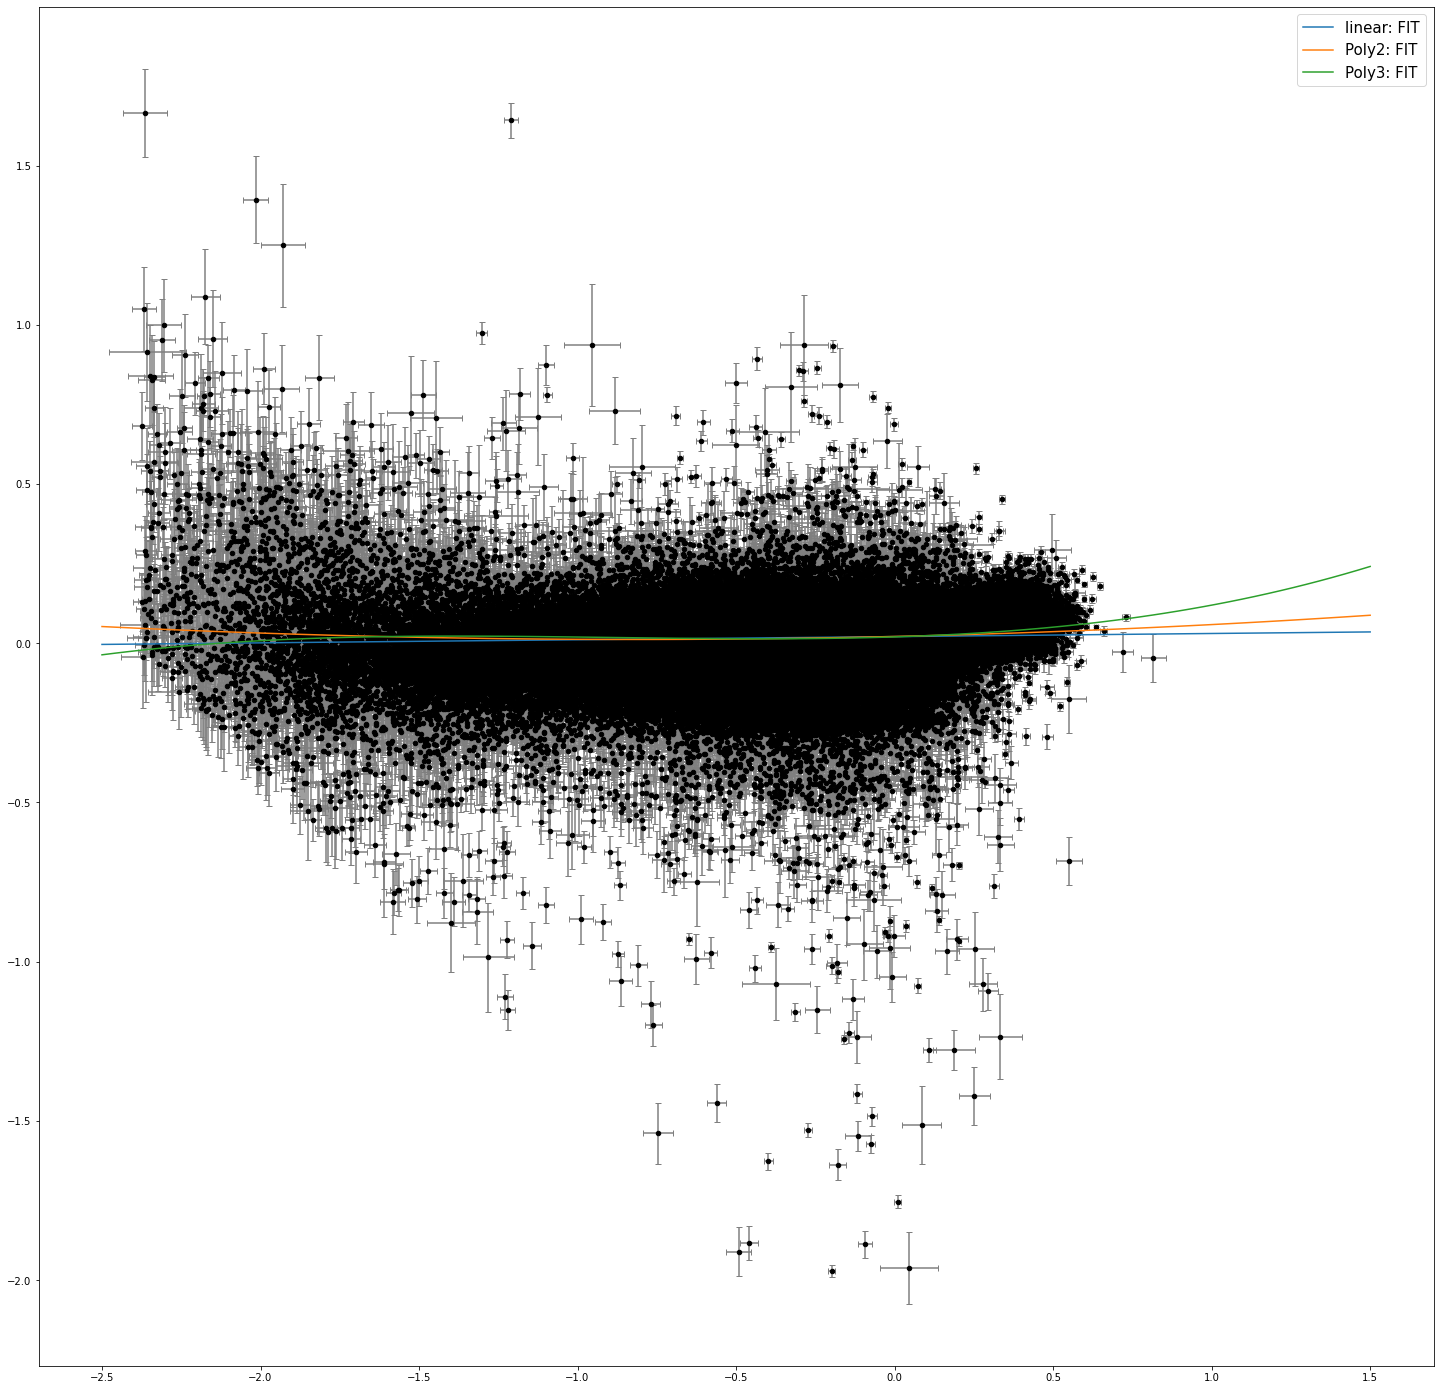

In [8]:
#Graph 7. (Fe_H vs NI_FE) 

# let's do a linear fit to the data
mk=(star['Fe_H'] > -1000) & (star['NI_FE'] > -1000)
mask=np.where(mk)[0]

glat_mask1 = star['GLAT'][mask]
ydat = star['NI_FE'][mask]
ydat_err = star['NI_FE_ERR'][mask]
xdat = star['Fe_H'][mask]
xdat_err = star['Fe_H_ERR'][mask]

#plot the linear fit
af1, af2 = mcFit2(linear,xdat, ydat, xdat_err, ydat_err)
#plot poly 2 fit
a2,b2,c2 = mcFit3(poly2, xdat, ydat, xdat_err, ydat_err)
#plot poly3 3 fit
a3,b3,c3,d3 = mcFit4(poly3, xdat, ydat, xdat_err, ydat_err)
#plot cosfit
#cf1,cf2,cf3,cf4 = mcFit4(cosfit, xdat, ydat, xdat_err, ydat_err, p0=[60,.01,.1,1])
#plot logfit
#lf1,lf2,lf3,lf4 = mcFit4(logfit, xdat, ydat, xdat_err, ydat_err)
#plot gausian
#g1,g2 = mcFit2(gausian,xdat, ydat, xdat_err, ydat_err)
#plot lorentzian_cauchy
#lc1,lc2,lc3 = mcFit3(lorentzian_cauchy, xdat, ydat, xdat_err, ydat_err)
#plot sigmoid
#s1,s2,s3,s4 = mcFit4(sigmoid, xdat, ydat, xdat_err, ydat_err,p0=[1,1,.1,.1])

x_plot = np.linspace(-2.5,1.5,100)

fig = plt.figure(figsize=(25,25))
ax = fig.add_subplot(111)
ax.scatter(xdat,ydat,s=20,c='black')
ax.errorbar(xdat, ydat,yerr=ydat_err,xerr=xdat_err, c='tab:gray',fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.plot(x_plot,linear(x_plot, af1, af2), label='linear: FIT')
ax.plot(x_plot,poly2(x_plot, a2, b2, c2), label='Poly2: FIT')  #best fit but the three shown are all very good fits.
ax.plot(x_plot,poly3(x_plot, a3, b3, c3, d3), label='Poly3: FIT')
#ax.plot(x_plot,cosfit(x_plot, cf1, cf2, cf3, cf4), label='Cosfit: FIT')
#ax.plot(x_plot,logfit(x_plot, lf1, lf2, lf3, lf4), label='logfit: FIT')
#ax.plot(x_plot,gausian(x_plot, g1, g2), label='gausian: FIT')
#ax.plot(x_plot,lorentzian_cauchy(x_plot, lc1,lc2,lc3), label='lorentzian_cauchy: FIT')
#ax.plot(x_plot,sigmoid(x_plot, s1, s2, s3, s4), label='sigmoid: FIT')

#Legend
plt.legend(loc='best', fontsize=15)
plt.show()